Group 1 - Model 4

Chosen dataset: CIFAR-10

**Model by**  Benjamin Hunt


In [42]:
from keras.backend import clear_session  # This is to clear any previous session to prevent reusing old data from  other cells etc.
clear_session()

In [43]:
import numpy as np  # Import libraries like CIFAR-10, Numpys and pandas etc.
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [44]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # (Training set: 50,000) - (Test set: 10,000) This will remain untouched until the final evaluation.

Visualize the data : We display a few images per class to understand what the model must learn.  

<Figure size 393.701x393.701 with 0 Axes>

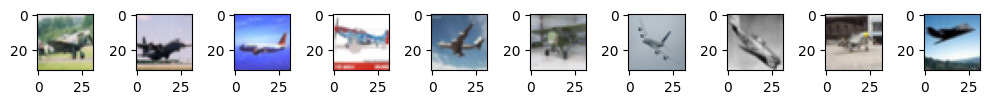

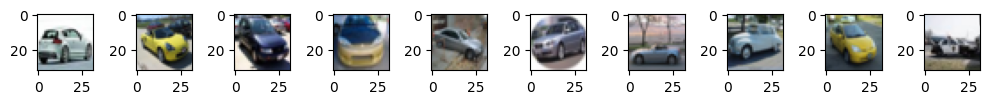

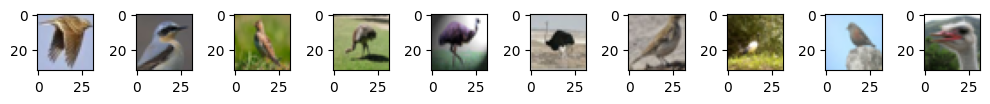

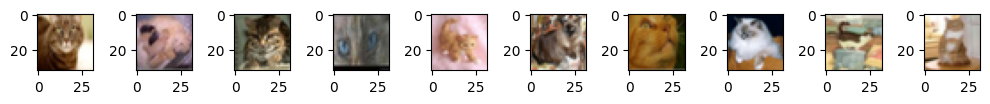

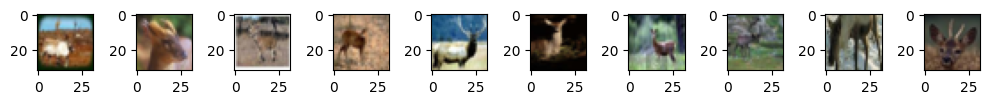

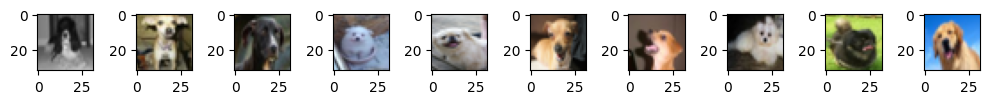

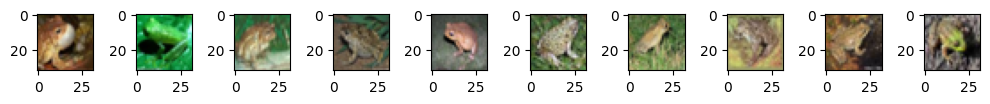

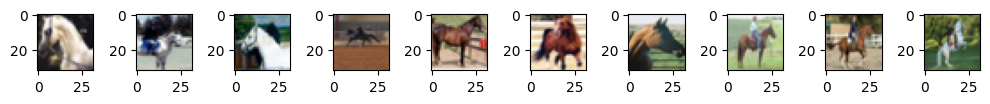

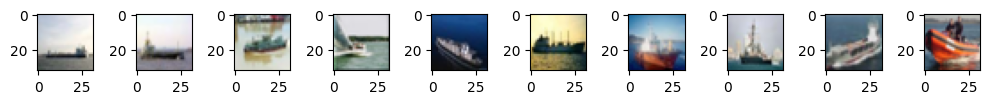

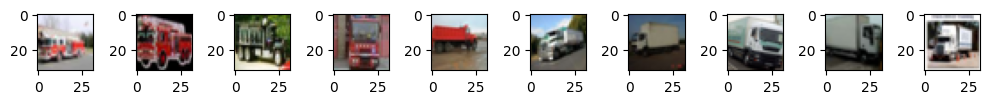

In [45]:

# print(x_train.shape) (check model shape)

num_classes = 10

fig = plt.figure(figsize=(10*1/2.54, 10*1/2.54)) # class to img plot ratio.

for idx_class in range(num_classes): # This section loops through class labels and shows sample images so we can check the dataset format and variety.

  all_idx = np.where(y_train.flatten() == idx_class)[0]

  # Random selection of 10 image of each category
  rand_idx = np.random.choice(all_idx, size=10, replace=False)
  selected = x_train[rand_idx]

  plt.figure(figsize=(10, 10))

  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(selected[i])
    plt.tight_layout()

  plt.show()

Data normalization

In [46]:
x_train = x_train.astype("float32") / 255 # neural networks train more stable when they are converted to [ 0 - 1 ], Here it is done with .astype function to normalize the code from [ 0 - 255 ].
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Prepare the labels

In [47]:
# Re-load CIFAR-10 dataset to ensure y_train and y_test are in their original integer label format
# This prevents issues if the cell is run multiple times
from tensorflow.keras.datasets import cifar10
(_, y_train_raw), (_, y_test_raw) = cifar10.load_data()

y_train = to_categorical(y_train_raw, num_classes=10) # Prepare the labels as they class from 0 - 9, this is ideal for catagorical crossentropy.
y_test = to_categorical(y_test_raw, num_classes=10)

print(y_train.shape)      # Here you casn see our train size and test size.
print(y_test.shape)

(50000, 10)
(10000, 10)


In [48]:
from sklearn.model_selection import train_test_split
import numpy as np

                                        # split out data into train/validation, to make sure each split has the same class balance as the original dataset.
y_train_labels = np.argmax(y_train, axis=1)

x_tr, x_val, y_tr, y_val = train_test_split( # explicitly train the model.
    x_train, y_train,
    test_size=0.1,            # explcitly remove 10% for test.
    random_state=42,         # random, shuffled state set before running our test.
    stratify=y_train_labels # Here we create our one hot labels.
)

print("x_tr:", x_tr.shape, "x_val:", x_val.shape)   # How does our data set structure look like after the split?
print("y_tr:", y_tr.shape, "y_val:", y_val.shape)

x_tr: (45000, 32, 32, 3) x_val: (5000, 32, 32, 3)
y_tr: (45000, 10) y_val: (5000, 10)


Data Augmentation

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
])


Define model

In [57]:


inputs = keras.Input(shape=(32,32,3))


x = data_augmentation(inputs)

model4 = keras.Sequential([
    keras.Input(shape=input_shape),

    # If x_train/x_test are already scaled to [0,1], keep this OUT.
    # If they are 0-255, then uncomment the next line:
    # layers.Rescaling(1./255),

    data_augmentation,

    # Block 1
    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    # Block 3
    layers.Conv2D(128, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.40),

    # Efficient head (instead of Flatten)
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.50),
    layers.Dense(num_classes, activation="softmax"),

], name="model4_aug_bn_dropout_gap")

model4.summary()

Model: "model4_aug_bn_dropout_gap"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 306,602 (1.17 MB)

 Trainable params: 305,706 (1.17 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8316 - loss: 0.5039 - val_accuracy: 0.7996 - val_loss: 0.6532 - learning_rate: 0.0010
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8228 - loss: 0.5203 - val_accuracy: 0.7714 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8281 - loss: 0.5156 - val_accuracy: 0.7936 - val_loss: 0.6292 - learning_rate: 0.0010
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8240 - loss: 0.5236 - val_accuracy: 0.7864 - val_loss: 0.6855 - learning_rate: 0.0010
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8258 - loss: 0.5307 - val_accuracy: 0.8284 - val_loss: 0.5053 - learning_rate: 0.0010
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8301 - loss: 0.5067 - val_accuracy: 0.8100 - val_loss: 0.5791 - learning_rate: 0.0010
Epoch 7/20
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8306 - lo

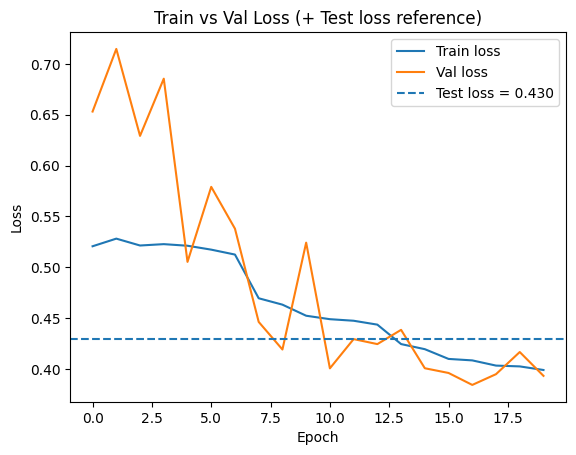

In [76]:
import time   # Track time for deeper statistics.
import matplotlib.pyplot as plt # plot results
from tensorflow.keras.callbacks  import EarlyStopping, ReduceLROnPlateau # imported to prevent overfitting

# Compile the model before training
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks to watch the behaviour between val and test to ensure they dont get to far apart, thus prevents over fitting.
early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,                 # stop after 5 epochs with no val_acc improvement
    restore_best_weights=True   # revert weights to best val_acc epoch
)

reduce_lr = ReduceLROnPlateau(  # When the val loss no longer improves. (lower is better), If it detects this, it shrinks the learning rate, letting the model take smaller steps to potentially improve further.
    monitor="val_loss",         # watch validation loss.
    factor=0.5,                 # When its triggered multiply learning rate by 0.5
    patience=2,                 # if validation loss doesnt improve in 2 epochs in a row, trigger the reduction.
    min_lr=1e-5,                # Dont reduce learning rate below 0.00001
    verbose=1                   # print one line at a time per epoch.
)

def format_seconds(s: float) -> str: # a function to improve readabilty of the results in the tests.
    s = max(0.0, float(s))           # safety guard to make sure the value is a float and doesnt go negative.
    m, sec = divmod(s, 60)           # m = minutes, sec = seconds. Convertion.
    h, m = divmod(m, 60)             # h = hours, m = remaining minutes
    if h >= 1:
        return f"{int(h)}h {int(m)}m {sec:.2f}s"
    if m >= 1:
        return f"{int(m)}m {sec:.2f}s"
    return f"{sec:.2f}s"

t0 = time.perf_counter() # Initialize t0 here

history1 = model4.fit(
    x_tr, y_tr,
    validation_data=(x_val, y_val),  # validation set is taken from training data only
    epochs=20,                       # High number of Epochs to show our over fitting preventing calls backs work.
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

t1 = time.perf_counter()       # Measure total training time using a monotonic clock

fit_time = t1 - t0

print(f"Fit time (total): {format_seconds(fit_time)}")


epochs_ran = len(history1.history["loss"])
print("Fit time per epoch (avg):", format_seconds(fit_time / epochs_ran)) # We divide total training time by the number of epochs actually completed.
                                                                          # This matters because EarlyStopping might stop before reaching the max epochs.

print("Train accuracy (last):", history1.history["accuracy"][-1]) # history1.history stores a list of values per epoch.
print("Train loss (last):", history1.history["loss"][-1])         # Using [-1] gives the final epoch value (the last item in the list).

print("Val accuracy (last):", history1.history["val_accuracy"][-1])
print("Val loss (last):", history1.history["val_loss"][-1])



val_acc_best = max(history1.history["val_accuracy"]) # We compute the highest validation accuracy achieved across all epochs.
                                                     # This helps us see the best point during training (often earlier than the final epoch).
best_epoch = 1 + history1.history["val_accuracy"].index(val_acc_best)
print("Val accuracy (best):", val_acc_best, "at epoch", best_epoch)

score = model4.evaluate(x_test, y_test, verbose=0) # The test set (x_test/y_test) was never used during training or validation.
                                                   # This is the true generalization score of the model.
                                                   # model.evaluate returns [loss, accuracy] because we compiled with metrics=['accuracy'].
print("TEST loss:", score[0])
print("TEST accuracy:", score[1])

test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=0)

plt.plot(history1.history["loss"], label="Train loss")
plt.plot(history1.history["val_loss"], label="Val loss")
plt.axhline(test_loss, linestyle="--", label=f"Test loss = {test_loss:.3f}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Val Loss (+ Test loss reference)")
plt.legend()
plt.show()

Test loss: 0.46148595213890076
Test accuracy: 0.8503999710083008
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Quick accuracy check: 0.8504


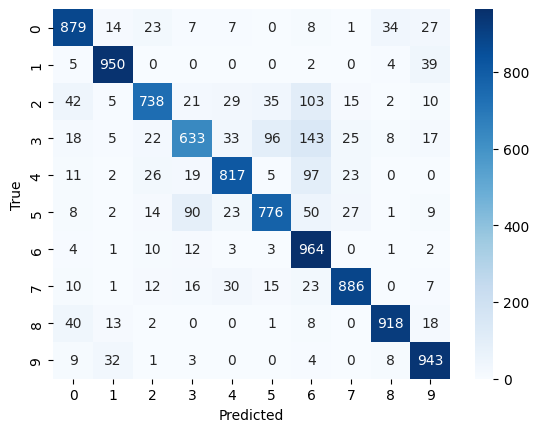

In [67]:
# FINAL TEST EVALUATION
# The test set (x_test/y_test) was never used during training or validation.
# This is the true generalization score of the model.
import matplotlib.pyplot as plt

import pandas as pd

score = model4.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])     # score[0] = test loss
print("Test accuracy:", score[1]) # score[1] = test accuracy


# prediction for test.

y_test_pred_prob = model4.predict(x_test) # shape: (10000, 10) probabilities for each test image
y_test_pred = y_test_pred_prob.argmax(axis=1) # convert probabilities → predicted class index (0–9)


# --- Build a results table with image_id so we can inspect predictions visually ---
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

y_true = np.argmax(y_test, axis=1)                 # true class index 0–9
y_conf = np.max(y_test_pred_prob, axis=1)          # confidence = max prob per image

results4 = pd.DataFrame({
    "image_id": np.arange(len(x_test)),            # image_id = index in x_test
    "true": y_true,
    "pred": y_test_pred,
    "confidence": y_conf
})

results4["correct"] = (results4["true"] == results4["pred"])
results4["true_name"] = results4["true"].map(lambda i: class_names[int(i)])
results4["pred_name"] = results4["pred"].map(lambda i: class_names[int(i)])

print("Quick accuracy check:", results4["correct"].mean())


# Plotting results into confusion matrix

conf_matr = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)



sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues') # Heatmap makes it easier to see where the model performs well (high diagonal)
                                                          # and where it makes systematic mistakes (clusters off-diagonal).

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [68]:
print(history1.history.keys())
print("Train accuracy:", history1.history["accuracy"][-1])
print("Train loss:", history1.history["loss"][-1])
print("Validation accuracy:", history1.history["val_accuracy"][-1])
print("Validation loss:", history1.history["val_loss"][-1])

test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=0)



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
Train accuracy: 0.8554444313049316
Train loss: 0.42751896381378174
Validation accuracy: 0.8555999994277954
Validation loss: 0.4209964871406555


In [69]:
import matplotlib.pyplot as plt

import math

def show_images_by_ids(ids, x_data, results_df, n=8):
    ids = list(ids)[:n]
    cols = 4
    rows = math.ceil(n / cols)

    plt.figure(figsize=(cols * 3.2, rows * 3.2))

    for i, img_id in enumerate(ids):
        row = results_df.loc[results_df["image_id"] == img_id].iloc[0]

        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(x_data[img_id])
        plt.axis("off")

        status = "✅" if row["correct"] else "❌"
        ax.set_title(
            f"{status} id={img_id}\n"
            f"T: {row['true_name']}\n"
            f"P: {row['pred_name']} ({row['confidence']:.2f})",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

results4["correct"].value_counts()

,count
correct,
True,8504
False,1496


Confident correct sample:
      image_id   true_name   pred_name  confidence
11          11       truck       truck         1.0
2450      2450  automobile  automobile         1.0
2445      2445        frog        frog         1.0
9955      9955        ship        ship         1.0
34          34       truck       truck         1.0
2184      2184       truck       truck         1.0
3157      3157       truck       truck         1.0
604        604  automobile  automobile         1.0


/tmp/ipython-input-936298762.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


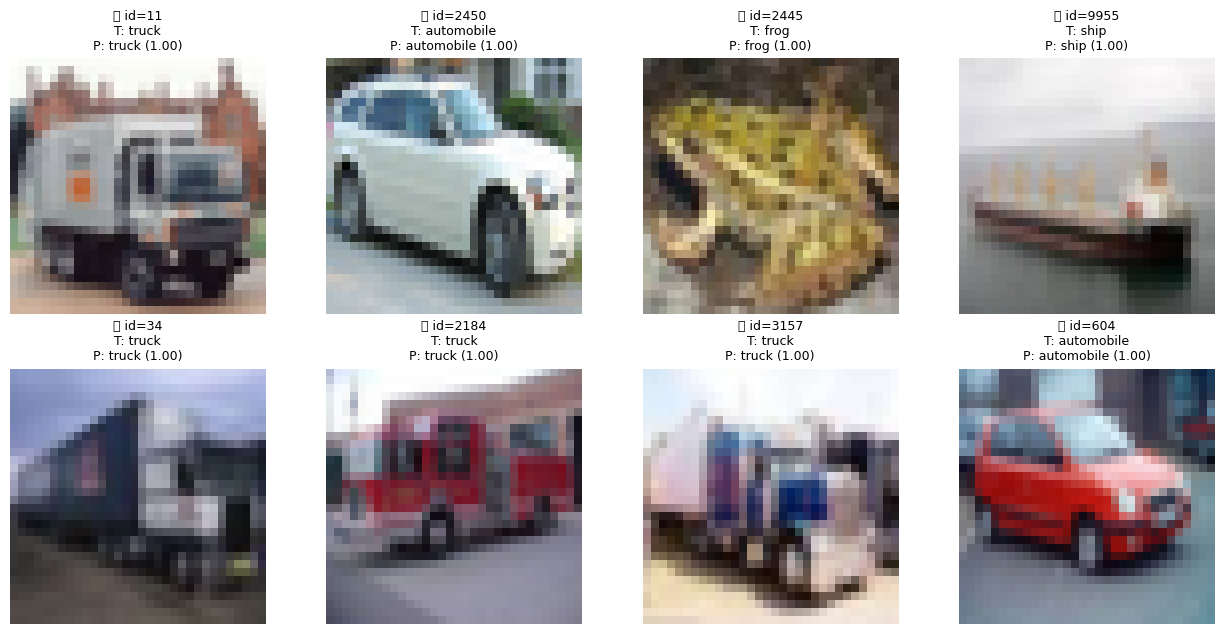

In [70]:
# confident that these img's are correct by model

correct = results4[results4["correct"] == True].sort_values("confidence", ascending=False)
ids_confident_correct = correct.head(8)["image_id"]

print("Confident correct sample:")
print(correct.head(8)[["image_id","true_name","pred_name","confidence"]])

show_images_by_ids(ids_confident_correct, x_test, results4, n=8)


/tmp/ipython-input-936298762.py:27: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


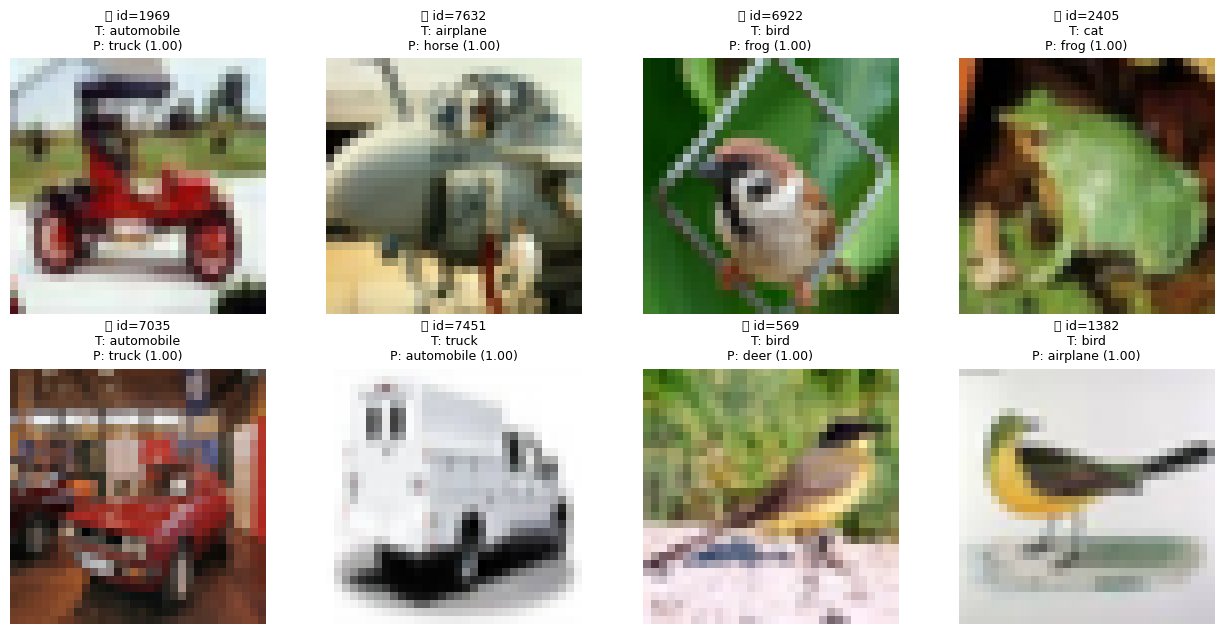

In [35]:
# show the most confidence that these are wrong predictions by the model.

wrong = results4[results4["correct"] == False].sort_values("confidence", ascending=False)
ids = wrong.head(8)["image_id"]
show_images_by_ids(ids, x_test, results4, n=8)

# T = Test Says
# P = Predicted by the model


/tmp/ipython-input-936298762.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


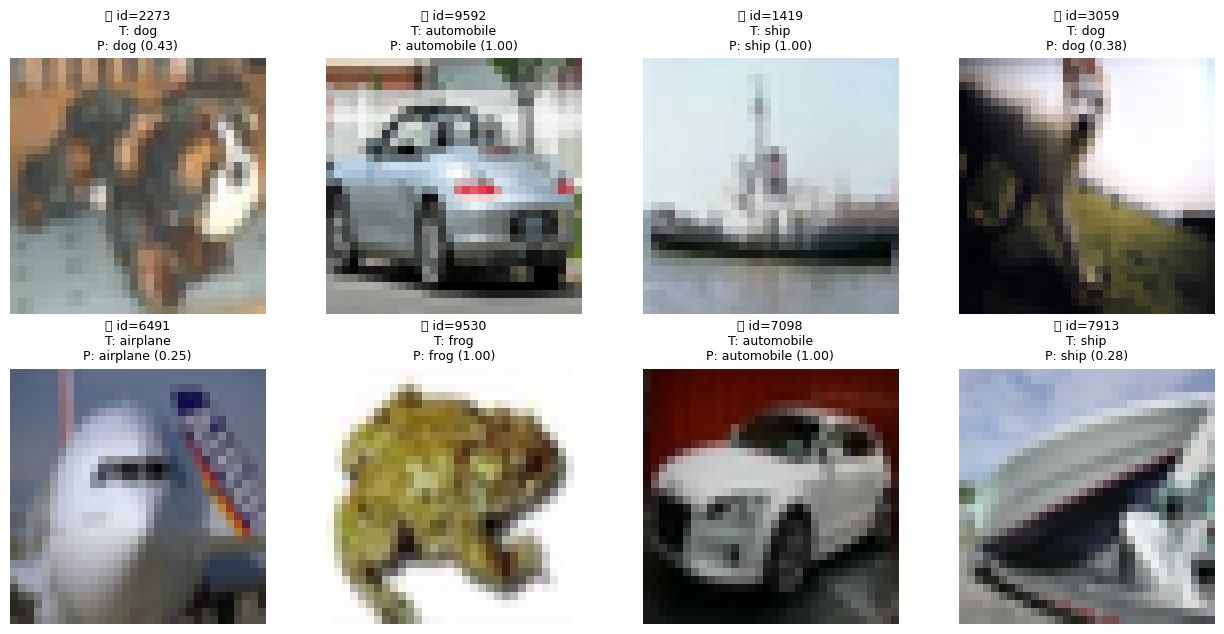

In [72]:
# Random Batch  of all confident ranges thaty they are wrong wrong and confident they are correct (cycles on each run request) Done to look for descrepencies in model judgment across other confidence ranges.

correct_sorted = results4[results4["correct"] == True].sort_values("confidence", ascending=False)

top_pool = correct_sorted.head(150)     # choose from top 150
low_pool = correct_sorted.tail(150)     # choose from bottom 150

ids = pd.concat([
    top_pool["image_id"].sample(4),
    low_pool["image_id"].sample(4)
]).sample(8)  # shuffle the final order

show_images_by_ids(ids.tolist(), x_test, results4, n=8)


In [ ]:
# Load model syntax

# import tensorflow as tf
# model1 = tf.keras.models.load_model("model1.keras")
# print("Loaded model1.keras")


In [79]:
import os
print("Working directory:", os.getcwd())
print("Files here:", os.listdir())

# Save full model (best default)
model4.save("cifar10.v4_G1_cnn.keras")


Working directory: /content
Files here: ['.config', 'cifar10.v1_G1_cnn.keras', '.ipynb_checkpoints', 'cifar10.v4_G1_cnn.keras', 'cifar10.v6_G1_cnn.keras', 'cifar10.model14.keras', 'sample_data']


This concludes Model-4

**Comparing Models **

x_val: (5000, 32, 32, 3) y_val: (5000, 10)
x_test: (10000, 32, 32, 3) y_test: (10000, 10)

=== Model comparison (sorted by test accuracy) ===


,model,val_accuracy,test_accuracy,val_loss,test_loss
0,Model 4 (current),0.8712,0.8601,0.384306,0.429935
2,Model v4,0.8568,0.8504,0.420136,0.461486
4,Model 14,0.8840,0.8474,0.325509,0.455658
3,Model v6,0.9968,0.8014,0.025375,0.800895
1,Model v1,0.8604,0.6354,0.447072,1.254702


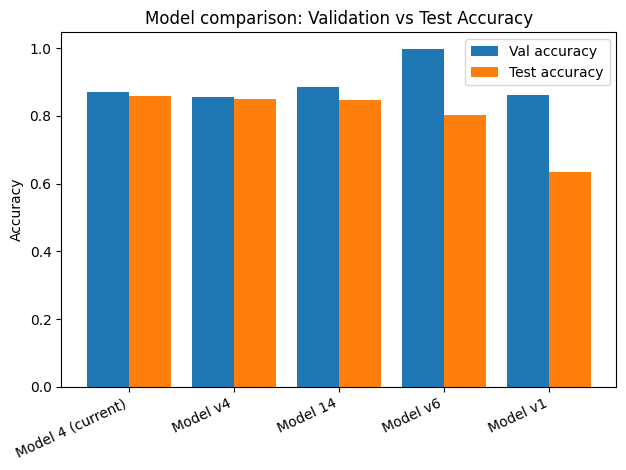

In [78]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# --- sanity checks ---
print("x_val:", x_val.shape, "y_val:", y_val.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)

# If you normalized x_test to [0,1] for model4, your loaded models MUST expect the same.
# If you one-hot encoded y_test, it must be shape (N,10).

model_files = {
    "Model 4 (current)": None,  # in-memory model4
    "Model v1": "/content/cifar10.v1_G1_cnn.keras",
    "Model v4": "/content/cifar10.v4_G1_cnn.keras",
    "Model v6": "/content/cifar10.v6_G1_cnn.keras",
    "Model 14": "/content/cifar10.model14.keras",
}

def safe_compile(m):
    # ensures evaluate works even if the saved model wasn't compiled
    m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return m

def evaluate_on_sets(m, x_val, y_val, x_test, y_test):
    val_loss, val_acc = m.evaluate(x_val, y_val, verbose=0)
    test_loss, test_acc = m.evaluate(x_test, y_test, verbose=0)
    return val_loss, val_acc, test_loss, test_acc

rows = []

# 1) Evaluate your current in-memory model4
m4 = safe_compile(model4)
val_loss, val_acc, test_loss, test_acc = evaluate_on_sets(m4, x_val, y_val, x_test, y_test)
rows.append({
    "model": "Model 4 (current)",
    "val_accuracy": val_acc,
    "test_accuracy": test_acc,
    "val_loss": val_loss,
    "test_loss": test_loss
})

# 2) Load and evaluate the other models
for name, path in model_files.items():
    if path is None:
        continue

    loaded = tf.keras.models.load_model(path)
    loaded = safe_compile(loaded)

    val_loss, val_acc, test_loss, test_acc = evaluate_on_sets(loaded, x_val, y_val, x_test, y_test)

    rows.append({
        "model": name,
        "val_accuracy": val_acc,
        "test_accuracy": test_acc,
        "val_loss": val_loss,
        "test_loss": test_loss
    })

df_compare = pd.DataFrame(rows).sort_values("test_accuracy", ascending=False)

print("\n=== Model comparison (sorted by test accuracy) ===")
display(df_compare)

# --- simple plot: val vs test accuracy ---
plt.figure()
x = range(len(df_compare))
plt.bar([i - 0.2 for i in x], df_compare["val_accuracy"], width=0.4, label="Val accuracy")
plt.bar([i + 0.2 for i in x], df_compare["test_accuracy"], width=0.4, label="Test accuracy")

plt.xticks(list(x), df_compare["model"], rotation=25, ha="right")
plt.ylabel("Accuracy")
plt.title("Model comparison: Validation vs Test Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
